# Projeto de Ciência dos Dados 

**Professor: Fábio Roberto Miranda**

**Aluna: Giulia Araujo Castro - 2B - Engenharia Mecatrônica**

Perguntas:

1) Ao entrar na OPEP um país aumenta consideravelmente sua produção de petróleo?

2) Após esse país entrar na OPEP há um crescimento considerável no PIB? Se sim, há uma redução na desigualdade social do país?

In [10]:
# Primeiramente vamos exportar as bibliotecas necessárias 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Agora vamos abrir as planílhas do Excel e guarda-las em variáveis 

produtores_petroleo = pd.read_excel('oil_production_total.xlsx')
pib_paises = pd.read_excel('gdp_total_yearly_growth.xlsx')
gini = pd.read_excel('inequality_index_gini.xlsx')

Agora vamos testar ambas as planílhas para ver se funcionou

In [4]:
produtores_petroleo.head()

,country,opep,1965,1966,1967,1968,1969,1970,1971,1972,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,1,26500000.0,33900000.0,39100000.0,42900000.0,44800000.0,48200000.0,37100000.0,50100000.0,...,86500000.0,85600000.0,77200000.0,73800000.0,71700000.0,67200000,64800000,68800000,67200000,68500000
1,Angola,1,655000.0,631000.0,537000.0,750000.0,2460000.0,5070000.0,5720000.0,7060000.0,...,82500000.0,93500000.0,87600000.0,90500000.0,83800000.0,86900000,87300000,83000000,88700000,87900000
2,Argentina,0,13800000.0,14600000.0,16000000.0,17500000.0,18100000.0,20000000.0,21600000.0,22200000.0,...,38300000.0,37800000.0,34000000.0,33300000.0,30900000.0,31100000,30500000,29900000,29800000,28800000
3,Australia,0,346000.0,445000.0,1040000.0,1930000.0,2230000.0,8700000.0,15300000.0,16300000.0,...,24500000.0,24100000.0,22400000.0,24500000.0,21500000.0,21400000,17800000,19100000,17400000,15500000
4,Azerbaijan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42600000.0,44500000.0,50400000.0,50800000.0,45600000.0,43400000,43500000,42100000,41600000,41000000


In [5]:
pib_paises.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [6]:
gini.head()

,country,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,...,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,NaN


Vamos agora cortar a tabela com os países produtores de petróleo e criar uma nova variável com apenas os páises pertencentes à OPEP

In [15]:
OPEP_produtores = produtores_petroleo[(produtores_petroleo.opep==1)]
OPEP_produtores.head()

,country,opep,1965,1966,1967,1968,1969,1970,1971,1972,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,1,26500000.0,33900000.0,39100000.0,42900000.0,44800000.0,48200000.0,37100000.0,50100000.0,...,86500000.0,85600000.0,77200000.0,73800000.0,71700000.0,67200000,64800000,68800000,67200000,68500000
1,Angola,1,655000.0,631000.0,537000.0,750000.0,2460000.0,5070000.0,5720000.0,7060000.0,...,82500000.0,93500000.0,87600000.0,90500000.0,83800000.0,86900000,87300000,83000000,88700000,87900000
13,Ecuador,1,429000.0,375000.0,322000.0,269000.0,214000.0,214000.0,214000.0,4190000.0,...,27500000.0,27200000.0,26100000.0,26100000.0,26800000.0,27100000,28200000,29800000,29100000,29300000
15,Equatorial Guinea,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15900000.0,16100000.0,14200000.0,12600000.0,11600000.0,12700000,12400000,13100000,13500000,13100000
16,Gabon,1,1270000.0,1450000.0,3450000.0,4640000.0,5030000.0,5420000.0,5800000.0,6300000.0,...,12300000.0,12000000.0,12000000.0,12400000.0,12500000.0,12700000,11600000,11600000,11500000,11400000


In [63]:
pib_paises

,country,opep,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,petro
0,Afghanistan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.400,4.56,13.600,2.500,20.200,8.040,6.980,14.8000,4.4700,0
1,Albania,0,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,...,5.530,5.77,5.850,7.240,3.280,3.360,2.860,2.6400,2.0600,0
2,Algeria,1,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,...,5.380,1.72,3.420,2.020,1.700,3.570,2.310,2.5800,2.9900,0
3,Andorra,0,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,...,7.800,4.97,0.161,-4.220,-5.060,-3.430,-2.830,NaN,NaN,0
4,Angola,1,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,...,20.500,18.60,23.200,13.800,2.390,3.450,3.870,4.9600,3.7900,0
5,Antigua and Barbuda,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.640,12.70,7.010,1.480,-10.700,-7.580,-1.980,3.8200,1.4600,0
6,Argentina,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.080,8.21,8.390,6.500,0.598,8.880,8.590,1.6400,3.9800,0
7,Armenia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.400,13.20,13.700,6.860,-14.800,1.420,3.940,7.2200,3.2700,0
8,Australia,0,-0.0331,-0.0331,-0.0332,-0.0329,-0.0330,-0.0330,-0.0330,-0.0331,...,3.700,2.93,4.860,2.600,1.640,3.140,2.590,3.1900,2.4700,0
9,Austria,0,0.6380,0.6380,0.6380,0.6380,0.6380,0.6380,0.6380,0.6380,...,2.530,3.65,3.750,1.390,-3.770,2.040,2.530,0.5210,0.2770,0


In [12]:
PIB_OPEP = pib_paises[(pib_paises.opep==1)]
PIB_OPEP.head()

,country,opep,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2,Algeria,1,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.42,2.02,1.700,3.57,2.31,2.58,2.99
4,Angola,1,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.20,13.80,2.390,3.45,3.87,4.96,3.79
50,Ecuador,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.58,5.22,4.51,2.24,6.36,0.997,3.19,7.87,4.81,3.92
53,Equatorial Guinea,1,0.118,0.118,0.118,0.118,0.118,0.118,0.118,0.118,...,38.00,9.78,1.25,13.10,12.30,-8.090,-1.32,4.98,3.19,-4.92
60,Gabon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.80,36.70,1.13,1.56,20.10,-8.050,25.10,-7.36,6.03,6.39


In [31]:
gini_OPEP = gini[(gini.opep==1)]
gini_OPEP.head()

,country,opep,1979,1980,1981,1982,1983,1984,1985,1986,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,teste
1,Algeria,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola
40,Ecuador,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.4,48.7,45.9,46.1,46.9,45.0,46.0,45.0,NaN,NaN
48,Gabon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN
63,Indonesia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39.5,NaN,NaN,NaN,NaN,NaN


## Pergunta 1

**Ao entrar na OPEP um país aumenta consideravelmente sua produção de petróleo?**

Para analizar essa pergunta escolhemos observar os dados de 3 países (Gabão, Equador e Nigéria) ao longos dos anos de 1965 até 2000. 

Vamos primeiramente recortar a tabela com os países pertencentes à OPEP, retirando assim os anos que não desejamos utilizar

In [33]:
paises3_idx = OPEP_produtores.set_index('country')
paises3_idx

,opep,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Algeria,1,26500000.0,33900000.0,39100000.0,42900000.0,44800000.0,48200000.0,37100000.0,50100000.0,50900000.0,...,86500000.0,85600000.0,77200000.0,73800000.0,71700000.0,67200000,64800000,68800000,67200000,68500000
Angola,1,655000.0,631000.0,537000.0,750000.0,2460000.0,5070000.0,5720000.0,7060000.0,8180000.0,...,82500000.0,93500000.0,87600000.0,90500000.0,83800000.0,86900000,87300000,83000000,88700000,87900000
Ecuador,1,429000.0,375000.0,322000.0,269000.0,214000.0,214000.0,214000.0,4190000.0,11200000.0,...,27500000.0,27200000.0,26100000.0,26100000.0,26800000.0,27100000,28200000,29800000,29100000,29300000
Equatorial Guinea,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15900000.0,16100000.0,14200000.0,12600000.0,11600000.0,12700000,12400000,13100000,13500000,13100000
Gabon,1,1270000.0,1450000.0,3450000.0,4640000.0,5030000.0,5420000.0,5800000.0,6300000.0,7600000.0,...,12300000.0,12000000.0,12000000.0,12400000.0,12500000.0,12700000,11600000,11600000,11500000,11400000
Indonesia,1,24500000.0,23900000.0,25700000.0,30300000.0,32400000.0,43100000.0,45000000.0,54700000.0,67500000.0,...,47800000.0,49400000.0,48400000.0,48600000.0,46300000.0,44600000,42700000,41200000,40700000,43000000
Iran,1,95700000.0,107000000.0,131000000.0,143000000.0,169000000.0,193000000.0,229000000.0,254000000.0,295000000.0,...,213000000.0,216000000.0,207000000.0,212000000.0,213000000.0,181000000,170000000,174000000,182000000,216000000
Iraq,1,64700000.0,68600000.0,60500000.0,74200000.0,74900000.0,76300000.0,83400000.0,72400000.0,99400000.0,...,105000000.0,119000000.0,120000000.0,121000000.0,137000000.0,153000000,153000000,160000000,197000000,219000000
Kuwait,1,119000000.0,126000000.0,126000000.0,133000000.0,141000000.0,152000000.0,163000000.0,167000000.0,154000000.0,...,130000000.0,136000000.0,121000000.0,123000000.0,141000000.0,154000000,151000000,150000000,148000000,153000000


In [55]:
paises3 = paises3_idx.loc[["Gabon", "Nigeria", "Ecuador" ],:]
paises3

,opep,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Gabon,1,1270000.0,1450000.0,3450000.0,4640000.0,5030000.0,5420000.0,5800000.0,6300000.0,7600000.0,...,12300000.0,12000000.0,12000000.0,12400000.0,12500000.0,12700000,11600000,11600000,11500000,11400000
Nigeria,1,13500000.0,20600000.0,15700000.0,6960000.0,26600000.0,53400000.0,75400000.0,89800000.0,101000000.0,...,112000000.0,103000000.0,105000000.0,119000000.0,116000000.0,114000000,109000000,113000000,112000000,98800000
Ecuador,1,429000.0,375000.0,322000.0,269000.0,214000.0,214000.0,214000.0,4190000.0,11200000.0,...,27500000.0,27200000.0,26100000.0,26100000.0,26800000.0,27100000,28200000,29800000,29100000,29300000


In [56]:
paises30 = paises3[paises3.columns[1:37]]
paises30

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
country,,,,,,,,,,,,,,,,,,,,,
Gabon,1270000.0,1450000.0,3450000.0,4640000.0,5030000.0,5420000.0,5800000.0,6300000.0,7600000.0,10200000.0,...,14700000.0,14500000.0,15200000.0,16800000.0,17800000.0,18300000.0,18200000.0,16800000.0,17000000.0,13800000.0
Nigeria,13500000.0,20600000.0,15700000.0,6960000.0,26600000.0,53400000.0,75400000.0,89800000.0,101000000.0,111000000.0,...,95900000.0,99100000.0,98700000.0,97100000.0,97500000.0,105000000.0,113000000.0,106000000.0,101000000.0,106000000.0
Ecuador,429000.0,375000.0,322000.0,269000.0,214000.0,214000.0,214000.0,4190000.0,11200000.0,9490000.0,...,16300000.0,17500000.0,18700000.0,20600000.0,21000000.0,20900000.0,21100000.0,20400000.0,20300000.0,21600000.0


In [57]:
paises3_transpose = paises30.transpose()
paises3_transpose

country,Gabon,Nigeria,Ecuador
1965,1270000.0,13500000.0,429000.0
1966,1450000.0,20600000.0,375000.0
1967,3450000.0,15700000.0,322000.0
1968,4640000.0,6960000.0,269000.0
1969,5030000.0,26600000.0,214000.0
1970,5420000.0,53400000.0,214000.0
1971,5800000.0,75400000.0,214000.0
1972,6300000.0,89800000.0,4190000.0
1973,7600000.0,101000000.0,11200000.0
1974,10200000.0,111000000.0,9490000.0


Text(0.5, 0, 'Anos')

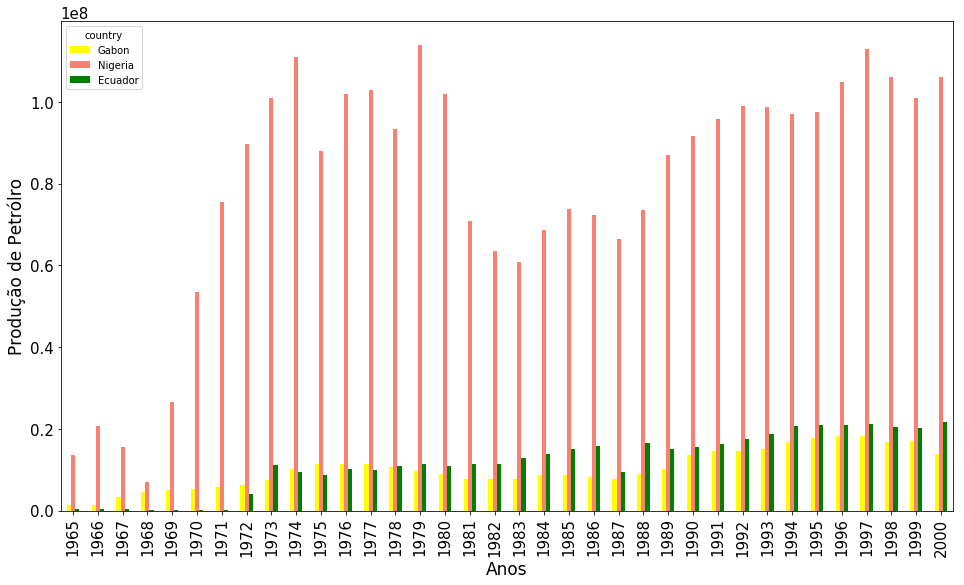

In [59]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
paises3_transpose.plot(kind='bar', color=('yellow', 'salmon', 'green'))
plt.ylabel('Produção de Petrólro')
plt.xlabel('Anos')